In [7]:
import mysql.connector

class Database:
    Database = None
    Cursor = None

    def Initialize():
        Database.Database = mysql.connector.connect(
            host="localhost",
            user="WSN",
            password="wsn123", 
            database='CTMCS',
            auth_plugin='mysql_native_password'
        )
        
        Database.Cursor = Database.Database.cursor()

    def Execute(query):
            Database.Cursor.execute(query)
            myresult = Database.Cursor.fetchall()
            
            ret = []
            for res in myresult:
                ret.append(res)

            return ret
Database.Initialize()

In [30]:
res = Database.Execute("select * from result")
#res = Database.Execute("select * from result inner join CTMCParameter where result.SimulationID = CTMCParameter.SimulationID and result.ResultID = CTMCParameter.ResultID")

In [31]:
res

[]

In [17]:
type(res[0][3])

float

In [19]:
import matplotlib.pyplot as plt

In [20]:
res2 = list(map(list, zip(*res)))

In [25]:
res2[2]

[3962.9660818599777,
 4555.228449622075,
 4716.531926488937,
 4697.190847375158,
 4221.240980386721,
 3783.9678521065694,
 3967.684918837334,
 3045.4716033959676,
 4314.646964611577,
 4547.158687493165,
 4110.438301556095,
 4597.185359182736,
 4171.069624841009,
 4228.357526582644,
 4275.278096261043,
 3776.7796571797944,
 4123.520898555595,
 3876.1325062604487,
 4632.817219701383,
 4548.537536367356,
 3705.758641803816,
 3995.436054747527,
 3960.3348479296274,
 4339.664234964466,
 4467.494489070391,
 5005.407855978717,
 4059.899148733375,
 4347.520377190363,
 4524.643670903667,
 4339.869162015278,
 3324.208511193344,
 4098.527746178665,
 3978.2585323434346,
 4126.921175741106,
 4344.061116427155,
 3748.097684152536,
 4536.29082766635,
 4093.8085476583697,
 4080.49848293035,
 4486.746198357048,
 4460.076808128291,
 4821.450699639913,
 4708.0284834959675,
 4108.958474686556,
 4463.724779441354,
 4160.012065651066,
 4024.331906666543,
 4274.441310743116,
 4263.844511069537,
 3188.2859057

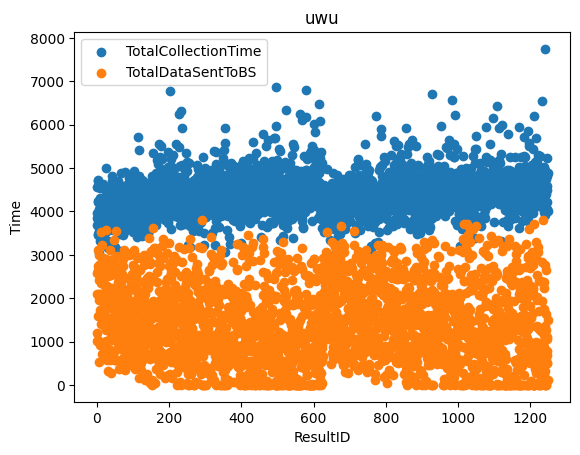

In [29]:
plt.title('uwu')
plt.xlabel('ResultID')
plt.ylabel('Time')
plt.scatter(res2[1], res2[2])
plt.scatter(res2[1], res2[3])
plt.legend(['TotalCollectionTime', 'TotalDataSentToBS'])
plt.show()